# Ridge regression lasso regression elastic net

In [1]:
from sklearn .datasets import load_boston

In [4]:
boston=load_boston()

In [5]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
# creating dataset

In [11]:
import pandas as pd
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [12]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [14]:
boston_df['TARGET']=boston.target



In [15]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
x=boston_df.drop('TARGET',axis=1)

In [18]:
x.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [19]:
y=boston_df['TARGET']
y.values

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [32]:
# Ridge regression =sum of errors+sum of squares of magnitude of coefficient(alpha)

In [33]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=1,solver='svd')
rr

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='svd', tol=0.001)

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [37]:
rr.fit(x_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='svd', tol=0.001)

In [39]:
y_predict=rr.predict(x_train)
y_predict

array([25.29223718, 22.42092495,  8.35280972, 20.6211219 , 15.10772968,
       31.76475656, 24.60464683, 25.32487707, 39.09485045, 28.74595643,
       14.67588406, 35.01424584, 36.45335556, 32.91640701, 21.72240767,
       17.16212337, 34.75795814, 39.86327543, 21.43576371, 15.81925998,
       27.76006701, 19.77077205, 27.05159799, 21.61273363, 25.28326518,
       22.68620691, 22.99949356, 28.30655129, 20.32556775, 24.22892721,
       28.95179412, 10.53378434, 26.78220329, 32.97228473, 15.22612352,
       13.72413035, 33.57456768, 13.85225313, 18.53031542, 16.27273846,
       17.05264042, 28.50407607, 33.86367965, 20.40236694, 24.84460702,
       16.48032015, 28.2100639 , 19.9752808 , 34.880547  , 13.96080602,
       20.16758902, 18.73526363, 19.62480557, 32.08509963, 16.6483862 ,
       28.31191239, 22.47172504, 28.94933728, 34.03947869, 35.84441934,
       24.18163154, 18.70464149, 18.74168906, 21.0778946 , 26.37424554,
       15.43774897, 15.36377506, 26.17147554, 22.81524605, 17.61

In [40]:
rr.score(x_train,y_train)

0.7264412428697166

In [41]:
rr.score(x_test,y_test)

0.7655800611077143

In [43]:
rr.coef_

array([-1.07392481e-01,  5.86542587e-02, -2.03610017e-02,  1.93764815e+00,
       -1.08242457e+01,  3.16397769e+00, -2.71608858e-03, -1.37083408e+00,
        2.85799035e-01, -1.19648594e-02, -8.90556121e-01,  7.77377947e-03,
       -5.55527072e-01])

In [45]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()

In [46]:
lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lin.score(x_train,y_train)

0.7293585058196337

In [48]:
lin.coef_

array([-1.12386867e-01,  5.80587074e-02,  1.83593559e-02,  2.12997760e+00,
       -1.95811012e+01,  3.09546166e+00,  4.45265228e-03, -1.50047624e+00,
        3.05358969e-01, -1.11230879e-02, -9.89007562e-01,  7.32130017e-03,
       -5.44644997e-01])

In [49]:
lin.score(x_test,y_test)

0.7634174432138457

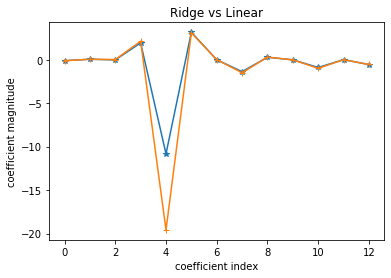

In [51]:
import matplotlib.pyplot as plt
plt.plot(rr.coef_,marker='*',label="Ridge coefficient")
plt.plot(lin.coef_,marker='+',label='Liner Coefficient')
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.title("Ridge vs Linear")
plt.show()

In [52]:
rr1=Ridge(alpha=100,solver='svd')

In [53]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [56]:
rr1.fit(x_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='svd', tol=0.001)

In [57]:
y_predict=rr1.predict(x_train)
y_predict

array([25.73889958, 23.83780964,  8.25295406, 19.62519023, 14.93460053,
       30.71346478, 24.69752582, 24.85399099, 38.81894252, 28.75755232,
       14.09977354, 34.10422096, 36.66065719, 32.3658094 , 22.96303145,
       18.51924552, 34.74042689, 37.87803872, 21.57460351, 15.46138486,
       27.43603261, 21.10332743, 26.77102345, 21.98836094, 24.82726516,
       23.49956154, 23.56504976, 28.06544121, 20.35125374, 24.41311866,
       28.77104481, 11.44115305, 26.73346323, 32.30309231, 15.60623099,
       14.35314072, 31.98257081, 13.04767955, 21.02595684, 15.65537181,
       16.5993538 , 28.50090261, 33.76724546, 21.2602834 , 25.2083405 ,
       15.44740236, 27.68919002, 19.62785987, 34.98730222, 14.37287987,
       21.65442481, 19.69836146, 18.1275185 , 32.44636424, 21.90494676,
       28.21425309, 20.70881708, 27.40505134, 32.02302529, 32.4053749 ,
       24.28599832, 19.59275526, 19.22766031, 21.64295967, 27.26961849,
       14.3171862 , 15.56932851, 26.35860403, 23.77343915, 17.46

In [59]:
rr1.coef_

array([-0.10111331,  0.06381384, -0.06533654,  0.44502504, -0.22716875,
        1.73501874,  0.00451706, -1.09427973,  0.30356273, -0.0144988 ,
       -0.83687014,  0.00771973, -0.67415461])

In [60]:
rr1.score(x_test,y_test)

0.7176526740818313

In [61]:
rr1.score(x_train,y_train)

0.7048848368270146

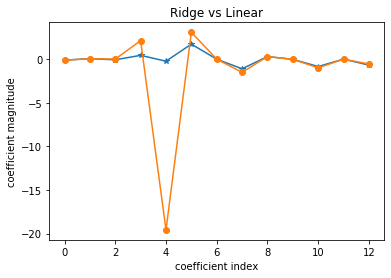

In [63]:
import matplotlib.pyplot as plt
plt.plot(rr1.coef_,marker='*',label="Ridge coefficient")
plt.plot(lin.coef_,marker='o',label='Liner Coefficient')
plt.xlabel("coefficient index")
plt.ylabel("coefficient magnitude")
plt.title("Ridge vs Linear")
plt.show()

# Lasso Regression

In [64]:
# lassoregression=sum of error+sum of absolute values of coefficient

In [80]:
from sklearn.linear_model import Lasso

In [81]:
l=Lasso()

In [112]:
import numpy as np
new_x=np.random.rand(100,1)
new_y=0.5*new_x**2+new_x+2+np.random.rand(100,1)
print(new_x.shape)
print(new_y.shape)

(100, 1)
(100, 1)


In [113]:
l.fit(new_x,new_y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [114]:
new_x[1]

array([0.46993271])

In [115]:
print('new_x',new_x)
print('new_y',new_y)

new_x [[0.76245607]
 [0.46993271]
 [0.67476594]
 [0.90318285]
 [0.66953764]
 [0.44132494]
 [0.55251746]
 [0.85005664]
 [0.34806653]
 [0.3942313 ]
 [0.4224375 ]
 [0.09560059]
 [0.84334061]
 [0.89211009]
 [0.82735389]
 [0.87275389]
 [0.88144855]
 [0.65673772]
 [0.72871135]
 [0.63825627]
 [0.13532061]
 [0.93797917]
 [0.22071431]
 [0.93013429]
 [0.31064906]
 [0.58792293]
 [0.42242198]
 [0.19252564]
 [0.96811987]
 [0.37408072]
 [0.76064235]
 [0.98538063]
 [0.28788757]
 [0.25131693]
 [0.92623811]
 [0.82676544]
 [0.91781045]
 [0.70021944]
 [0.77598844]
 [0.54141633]
 [0.62583843]
 [0.60116728]
 [0.083338  ]
 [0.95036278]
 [0.89768338]
 [0.41162691]
 [0.54907865]
 [0.26628898]
 [0.38825473]
 [0.77885245]
 [0.15354674]
 [0.40202784]
 [0.11539551]
 [0.15491035]
 [0.38451445]
 [0.12418037]
 [0.59537792]
 [0.49708946]
 [0.9623625 ]
 [0.02181411]
 [0.07914906]
 [0.30852432]
 [0.1981872 ]
 [0.60816088]
 [0.53845272]
 [0.18724872]
 [0.04885533]
 [0.46909413]
 [0.89226475]
 [0.58124045]
 [0.05349563]


In [116]:
l.predict([[0.9]])

array([3.18063377])

In [117]:
l.predict([[0.3]])

array([3.18063377])

In [118]:
from sklearn.model_selection import train_test_split
new_x_test,new_x_train,new_y_test,new_y_train=train_test_split(new_x,new_y,test_size=0.2,random_state=2)
l.score(new_x_test,new_y_test)

-0.013141796639318137

In [119]:
l.score(new_x_train,new_y_train)

-0.23630984487113513

In [120]:
l.coef_

array([0.])

In [121]:
l.fit(new_x_train,new_y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [122]:
l=Lasso(alpha=1)
l.fit(x_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [123]:
l.coef_

array([-0.0648603 ,  0.05817447, -0.00380911,  0.        , -0.        ,
        0.12714283,  0.02477025, -0.59099456,  0.25009076, -0.01339683,
       -0.7775077 ,  0.006636  , -0.78867463])

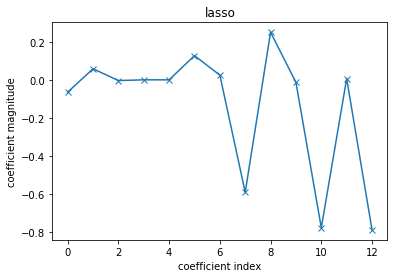

In [125]:
plt.plot(l.coef_,marker='x',label='Lasso Regression')
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.title('lasso')
plt.show()

In [127]:
# Elastic Regression-->combination of ridge and lasso regression
# if ratio=1-->lasso regression
# if ratio=0-->ridge regression

In [129]:
 from sklearn.linear_model import ElasticNet

In [130]:
e=ElasticNet

In [131]:
e

sklearn.linear_model.coordinate_descent.ElasticNet

In [132]:
p=6*np.random.rand(50,2)
q=8*p*82+p+2+np.random.rand(50,2)
print(p.shape)
print(q.shape)

(50, 2)
(50, 2)


In [138]:
e=ElasticNet(alpha=0.1,l1_ratio=1)
e

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [139]:
e.fit(p,q)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [133]:
p[1]

array([1.31580222, 4.17628874])

In [134]:
q[1]

array([ 866.75114255, 2746.14398865])

In [140]:
e.coef_

array([[656.960512  ,   0.        ],
       [ -0.        , 656.95317787]])

In [141]:
e.predict([[0.98254076,2.54782463]])

array([[ 648.08986474, 1676.53304533]])